In [109]:
import pandas as pd
import re
import html
from datetime import datetime

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1073]:
df_tags = pd.read_csv('Tags.csv',usecols =['Id','TagName','Count','ExcerptPostId','WikiPostId'])

### TAGS

In [ ]:
# сделаем сводный датасет, чтобы видеть выдержку об тэге

In [1100]:
df_tags_test = df_tags.copy()
df_tags_test = df.loc[:,'TagName':'WikiPostId']

In [1101]:
df_tags_test['Id'] = df_tags_test['ExcerptPostId']

In [1112]:
df_Excerpt = df_tags_test.merge(df_post,how = 'left',on ='Id')[['Id','TagName','Body']]

In [1114]:
df_Excerpt.rename(columns={'Body':'Excerpt'},inplace=True)

In [1130]:
df_WikiPostId = df_tags_test.merge(df_post,how = 'left',on ='Id')[['Id','TagName','Body']]

In [1131]:
df_WikiPostId.rename(columns={'Body':'WikiPostId'},inplace=True)

In [1132]:
len(df_Excerpt) == len(df_WikiPostId)

True

In [1150]:
df_tags_Excerpt = pd.concat([df_Excerpt,df_WikiPostId.loc[:,['WikiPostId']]],axis = 1)

In [1151]:
df_tags_Excerpt.head()

,Id,TagName,Excerpt,WikiPostId
0,413473.0,python,Python — высокоуровневый язык с динамической т...,"<p><a href=""https://www.python.org/"" rel=""nofo..."
1,703568.0,smtp,Простой протокол передачи почты (SMTP) - это с...,"<p>SMTP был впервые определен <a href=""https:/..."
2,414254.0,postgresql,PostgreSQL — объектно-реляционная система упра...,<p>PostgreSQL — объектно-реляционная система у...
3,413332.0,linux,Linux — общее название UNIX-подобных операцион...,<p>Linux — семейство UNIX-подобных операционны...
4,414905.0,svn,NaN,NaN


In [1074]:
df_tags.head()

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,python,15829,413473.0,413472.0
1,2,smtp,199,703568.0,703567.0
2,3,postgresql,1967,414254.0,414253.0
3,4,linux,5866,413332.0,413331.0
4,5,svn,105,414905.0,414904.0


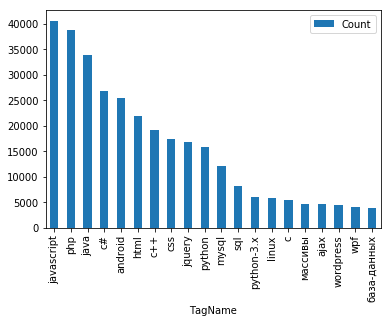

In [1076]:
df_tags.loc[:,['TagName','Count']].sort_values(by = 'Count',ascending = False).head(20).plot(kind = 'bar',x='TagName')

### BADGES

In [1077]:
df_badges = pd.read_csv('Badges.csv')
df_badges = df_badges.iloc[:,1:]

In [189]:
def str_to_datetime_year(timestamp):
    f = '%Y-%m-%dT%H:%M:%S.%f'
    data_time = datetime.strptime(timestamp, f)
    return data_time.year

In [187]:
def str_to_datetime_month(timestamp):
    f = '%Y-%m-%dT%H:%M:%S.%f'
    data_time = datetime.strptime(timestamp, f)
    return data_time.month

In [188]:
def str_to_datetime_day(timestamp):
    f = '%Y-%m-%dT%H:%M:%S.%f'
    data_time = datetime.strptime(timestamp, f)
    return data_time.day

In [193]:
df_badges['Year'] = df_badges['Date'].apply(str_to_datetime_year)
df_badges['Month'] = df_badges['Date'].apply(str_to_datetime_month)
df_badges['Day'] = df_badges['Date'].apply(str_to_datetime_day)

In [671]:
df_badges.head()

,Id,UserId,Name,Date,Class,TagBased,Year,Month,Day
0,40165,10105,c++,2015-03-31T02:53:53.050,1,True,2015,3,31
1,40166,5648,java,2015-03-31T02:53:53.050,1,True,2015,3,31
2,40167,2739,c++,2015-03-31T02:53:53.050,1,True,2015,3,31
3,40168,10105,c#,2015-03-31T02:53:53.050,1,True,2015,3,31
4,40169,16095,php,2015-03-31T02:53:53.050,2,True,2015,3,31


### USERS

In [98]:
df_users = pd.read_csv('Users.csv')

In [205]:
df_users['Id'] = df_users.Id.replace({-1:1})

In [214]:
df_users['CreationDateYear'] = df_users['CreationDate'].apply(str_to_datetime_year)
df_users['CreationDateMonth'] = df_users['CreationDate'].apply(str_to_datetime_month)
df_users['CreationDateDay'] = df_users['CreationDate'].apply(str_to_datetime_day)

In [1078]:
df_users.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,CreationDateYear,CreationDateMonth,CreationDateDay
0,1,1,2014-07-30T23:40:52.457,Дух сообщества,2014-07-30T23:40:52.457,NaN,Дата-центр Stack Exchange,"<p>Привет, Мир! </p>\n\n<p>Я — выдуманный перс...",0,10499,23244,-1.0,2014,7,30


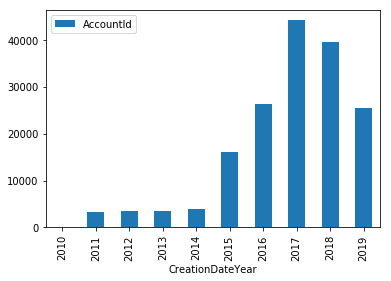

In [249]:
df_users.groupby('CreationDateYear').count()[['AccountId']].plot(kind = 'bar' );

In [754]:
df_badges[df_badges.Name.str.contains('Answer')].Name.value_counts()

Nice Answer     3338
Good Answer      336
Great Answer      14
Name: Name, dtype: int64

In [742]:
df_badges[df_badges.Name.str.contains('Question')].Name.value_counts()

Popular Question     30371
Notable Question     11539
Famous Question       2019
Nice Question         1411
Good Question          196
Favorite Question       34
Great Question           6
Stellar Question         4
Name: Name, dtype: int64

### Работаем с Юзерами, которые в Badges имеют Name с "Question" & "Answer"

In [744]:
df_quest = df_badges[df_badges.Name.str.contains('Question')]

In [757]:
df_answer = df_badges[df_badges.Name.str.contains('Answer')]

In [826]:
df_quest.head()

,Id,UserId,Name,Date,Class,TagBased,Year,Month,Day
576,40773,6,Nice Question,2015-03-31T05:59:58.673,3,False,2015,3,31
577,40774,6,Nice Question,2015-03-31T05:59:58.673,3,False,2015,3,31
578,40775,6,Nice Question,2015-03-31T05:59:58.673,3,False,2015,3,31
579,40776,6,Nice Question,2015-03-31T05:59:58.673,3,False,2015,3,31
580,40777,204,Nice Question,2015-03-31T05:59:58.673,3,False,2015,3,31


In [836]:
df_users.loc[df_users.isin(df_quest.UserId.to_list()).Id].head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,CreationDateYear,CreationDateMonth,CreationDateDay
1,2,29732,2010-10-10T08:53:27.670,stanislav,2015-07-01T16:28:14.480,NaN,NaN,NaN,1072,648,71,6027046.0,2010,10,10


In [837]:
df_users.loc[df_users.isin(df_answer.UserId.to_list()).Id].head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,CreationDateYear,CreationDateMonth,CreationDateDay
1,2,29732,2010-10-10T08:53:27.670,stanislav,2015-07-01T16:28:14.480,NaN,NaN,NaN,1072,648,71,6027046.0,2010,10,10


In [815]:
a = df_users.loc[df_users.isin(df_quest.UserId.to_list()).Id]

In [814]:
c = df_users.loc[df_users.isin(df_answer.UserId.to_list()).Id]

In [833]:
df_users_new = a.merge(c,how='outer')

### Посмотрим на посты 

In [840]:
df_post.PostTypeId.value_counts()

2    317033
1    279603
5      1832
4      1832
6        36
7         5
Name: PostTypeId, dtype: int64

#### инетресуют 1,2

In [ ]:
#1 Question
#2 Answer

In [842]:
df_post_q = df_post[df_post['PostTypeId']==1] # с вопросами

In [843]:
df_post_a = df_post[df_post['PostTypeId']==2] # с ответами

### Для Id в df_post_a может быть комментарий к ответу

In [892]:
df_post_a[df_post_a.Id == 184].Body.to_list()

['<p>Клонировать раздел Vista можно с помощью ntfsclone, а сжать полученный образ можно с помощью lzma или xz.</p>\n<p>Сохранение раздела /dev/sda1 в файл /media/Данные/backup.xz.</p>\n<pre><code>sudo ntfsclone -o - -s /dev/sda1 | xz -z -c - &gt; /media/Данные/backup.xz\n</code></pre>\n<p>Восстановление раздела /dev/sda1 из файла /media/Данные/backup.xz.</p>\n<pre><code>sudo xz -d -c /media/Данные/backup.xz | ntfsclone -O /dev/sda1 -r -\n</code></pre>']

In [893]:
df_comments[df_comments.PostId ==184].Text.to_list()

['Удобный способ. Но нужно иметь в виду, что сохранение образа небыстрое. У меня для раздела размером 40 Гб, занятого наполовину, сохранение заняло 9 часов, а восстановление - 20 минут.']

### у каждого комментария есть рейтинг "Score"

In [897]:
df_comments[df_comments.PostId ==184][['Text','Score']]

,Text,Score
0,"Удобный способ. Но нужно иметь в виду, что сох...",2


### посмотрим как дела обсоят с вопросами df_post_q, есть ли на них комментарии

In [915]:
df_comments.loc[df_comments.isin(df_post_q.Id.to_list()).Id].head()

,Id,PostId,Score,Text,CreationDate,UserId,CreationDateYear,CreationDateMonth,CreationDateDay
194595,412876,412859,0,"Чойта? \nХотя... Да, итераций будет девять, н...",2015-03-30T16:21:27.157,NaN,2015,3,30
194596,412877,412876,0,"Вы уверены, что не меняете коллекцию внутри ци...",2015-03-31T06:34:34.363,106.0,2015,3,31
194605,412888,412764,0,"@avp , не могли бы ли Вы преобразовать свой ко...",2015-03-31T09:08:21.990,22241.0,2015,3,31
194607,412899,412885,1,"Мне не нравится костыль для получения индекса,...",2015-03-31T09:57:05.237,176051.0,2015,3,31
194616,412913,412903,0,"Да, всегда первый",2015-03-31T10:22:20.057,20684.0,2015,3,31


In [920]:
df_post_q[df_post_q.Id == 412876].Body.to_list()

['<p>Есть конструкция вида:</p>\n\n<pre><code>while(!found)\n{\n foreach(Tile tile in incoming_tiles)\n {\n  //обработка входящего List\n }\n incoming_tiles=outcoming_tiles;\n}\n</code></pre>\n\n<p>Формирование outcoming_tiles происходит внутри foreach, изменение переменной found происходит там же</p>\n\n<p>При попытке прогнать код, на второй иттерации выдает ошибку "коллекция была изменена". Знаю, что подобное возникает когда коллекцию пытаешься изменить внутри foreach, но не могу понять, почему нельзя её менять вне foreach и снова подавать на вход в цикле.</p>\n\n<p>Хотелось бы узнать, в чем дело и как это можно обойти, заранее спасибо.</p>\n\n<p>UP: Полный код цикла </p>\n\n<pre><code>        while (!found)\n        {\n                foreach (Position tile in incoming)\n                {\n                    if (tile.X &lt; map.GetLength(0) &amp;&amp;\n                        tile.X &gt; 0 &amp;&amp;\n                        tile.Y &lt; map.GetLength(1) &amp;&amp;\n                

In [1072]:
df_comments[df_comments.PostId == 412876][['Text']]

,Text
194596,"Вы уверены, что не меняете коллекцию внутри ци..."
194597,Добавил полный код цикла


In [922]:
# для каждого из типов постов #1 Question и #2 Answer есть комментарии с рейтингом комменатрия
# это может нам пригодится

###  посмотрим на  Votes 

In [925]:
df_votes.head()

,Id,PostId,VoteTypeId,CreationDate,CreationDateYear,CreationDateMonth,CreationDateDay
0,2243811,2,1,2010-10-10T00:00:00.000,2010,10,10
1,2243812,4,1,2010-10-10T00:00:00.000,2010,10,10
2,2243813,6,1,2010-10-10T00:00:00.000,2010,10,10
3,2243814,8,1,2010-10-11T00:00:00.000,2010,10,11
4,2243815,10,1,2010-10-11T00:00:00.000,2010,10,11


In [ ]:
#Votetypeid 2: UpMod; this is equivalent to an upvote
#Votetypeid 3: DownMod; this is equivalent to a downvote

#### посмотрим на топ самых "непопулярных вопросов"

In [1032]:
votes_3 = df_votes[df_votes.VoteTypeId ==3][['PostId','VoteTypeId']]

In [1068]:
list_of_votes_3 = votes_3.groupby('PostId').count().sort_values(by = 'VoteTypeId',ascending = False)[:20].\
reset_index().PostId.to_list()

In [1069]:
top_worst = df_post_q.loc[df_post_q.Id.isin(list_of_votes_3)][['Body']]
top_worst

,Body
36195,<pre><code> &lt;?php\nClass A {\n pr...
38089,<p>Я в качестве хобби люблю взлом сайтов.<br>\...
56436,"<p>Как можно усовершенствовать random, чтобы о..."
204734,"<p>Дано <em>n</em>, вычислить:</p>\n\n<p><a hr..."
205783,<p>Для данного списка различных чисел от 1 до ...
273362,"<p>На каком уровне и что нужно уметь на С++, ч..."
285715,"<p>Вот задание по JavaScript, которое я пытаюс..."
454356,"<p>Народ, помогите решить уравнение </p>\n\n<p..."


In [1070]:
#пример
top_worst.Body.to_list()[0]

"<pre><code>    &lt;?php\nClass A {\n        protected $a = 'Если ты меня видишь, я - баг :)';\n}\n\nClass B extends A {\n        public function getA () {\n                $a = new A();\n                echo $a-&gt;a;\n        }\n}\n\n$b = new B();\necho $b-&gt;getA();\n?&gt;\n</code></pre>\n<p>Как-то так :) Будьте осторожны, товарищи :)</p>"

In [105]:
df_votes = pd.read_csv('Votes.csv')

In [251]:
df_votes['CreationDateYear'] = df_votes['CreationDate'].apply(str_to_datetime_year)
df_votes['CreationDateMonth'] = df_votes['CreationDate'].apply(str_to_datetime_month)
df_votes['CreationDateDay'] = df_votes['CreationDate'].apply(str_to_datetime_day)

In [ ]:
#Votetypeid 2: UpMod; this is equivalent to an upvote
#Votetypeid 3: DownMod; this is equivalent to a downvote

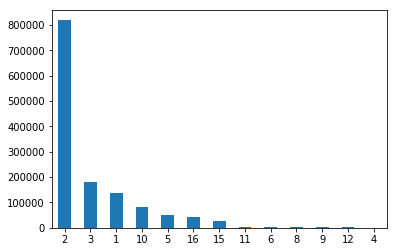

In [648]:
df_votes.VoteTypeId.value_counts().plot(kind = 'bar',x = 'VoteTypeId',rot = True)

In [278]:
import seaborn as sns

In [348]:
df_votes.VoteTypeId.value_counts(dropna = False)

2     817430
3     181740
1     136951
10     79821
5      48603
16     42674
15     25282
11      3996
6       3577
8       2046
9       2035
12       596
4        127
Name: VoteTypeId, dtype: int64

In [395]:
Vote_type_percent = df_votes.VoteTypeId.value_counts(dropna = False)/ \
df_votes.VoteTypeId.value_counts().values.sum() *100

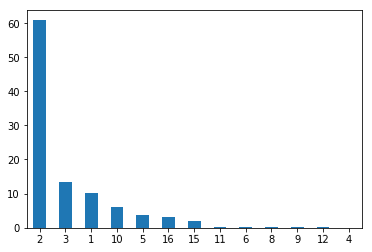

In [398]:
Vote_type_percent.plot(kind = 'bar',x = 'VoteTypeId',rot = True)

In [329]:
df_test = df_votes.groupby(['CreationDateYear','VoteTypeId']).count()

In [331]:
df_test.rename(columns={'Id':'Count'},inplace=True)

In [349]:
df_voted_type = df_test.iloc[:,[0]].unstack()

In [353]:
df_voted_type.fillna(0,inplace=True)

In [361]:
df_voted_type

Count                                                   \
VoteTypeId             1         2        3     4        5       6      8    
CreationDateYear                                                             
2010                226.0     433.0     23.0   0.0      5.0     0.0    0.0   
2011               4507.0   22841.0   2107.0   0.0   1055.0   580.0    0.0   
2012               8201.0   43961.0   5765.0   0.0   2012.0   591.0    0.0   
2013               7657.0   38173.0   4997.0   0.0   1951.0   915.0    0.0   
2014               6625.0   25543.0   2336.0   0.0   1132.0  1123.0    0.0   
2015              13528.0   85469.0  22897.0  17.0   3496.0   368.0  143.0   
2016              24508.0  183558.0  38846.0  34.0   9688.0     0.0  488.0   
2017              27592.0  180233.0  42490.0  36.0  11809.0     0.0  623.0   
2018              28326.0  160333.0  38781.0  12.0  11275.0     0.0  520.0   
2019              15781.0   76886.0  23498.0  28.0   6180.0     0.0  272.0   

                                                                  
VoteTypeId           9        10      11     12      15       16  
CreationDateYear                                                  
2010                0.0     22.0     0.0    0.0     0.0      0.0  
2011                0.0   2096.0     0.0    0.0     0.0      0.0  
2012                0.0   3208.0     0.0    0.0     0.0      0.0  
2013                0.0   3020.0     0.0    0.0     0.0      0.0  
2014                0.0   3435.0     0.0    0.0     0.0      0.0  
2015              138.0  13902.0   417.0   68.0  4112.0   6121.0  
2016              478.0  11796.0   796.0  171.0  5311.0  11110.0  
2017              623.0  16361.0  1046.0  163.0  5077.0  11903.0  
2018              526.0  15609.0  1046.0  128.0  7082.0   9577.0  
2019              270.0  10372.0   691.0   66.0  3700.0   3963.0

In [381]:
['VotedTypeId'+' ' + str(i) for i in [1,2,3,4,5,6,8,9,10,11,12,15,16] ]

['VotedTypeId 1',
 'VotedTypeId 2',
 'VotedTypeId 3',
 'VotedTypeId 4',
 'VotedTypeId 5',
 'VotedTypeId 6',
 'VotedTypeId 8',
 'VotedTypeId 9',
 'VotedTypeId 10',
 'VotedTypeId 11',
 'VotedTypeId 12',
 'VotedTypeId 15',
 'VotedTypeId 16']

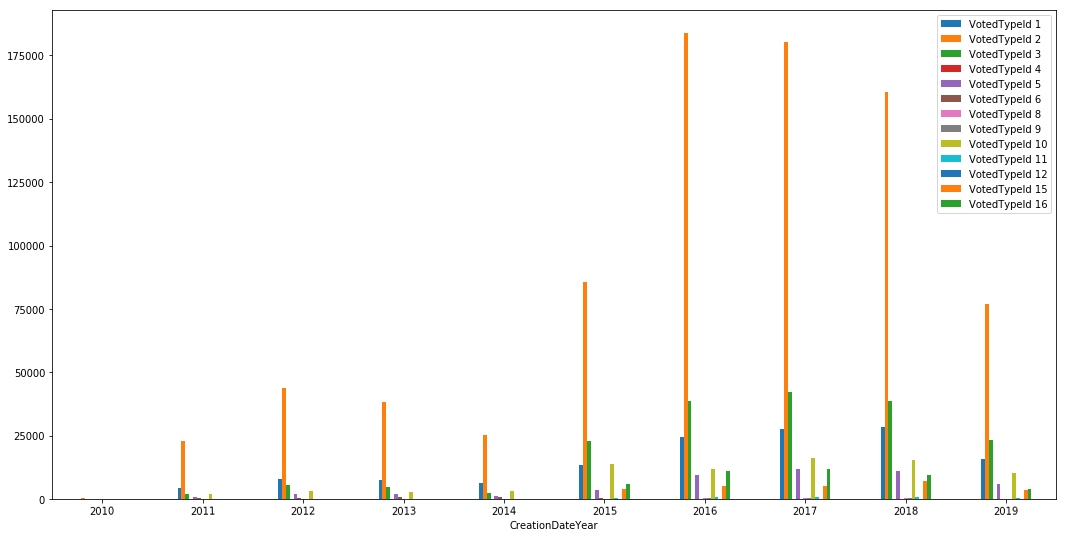

In [382]:
ax = df_voted_type.plot(kind = 'bar',figsize=(18,9),rot=True)
ax.legend(['VotedTypeId'+' ' + str(i) for i in [1,2,3,4,5,6,8,9,10,11,12,15,16] ])

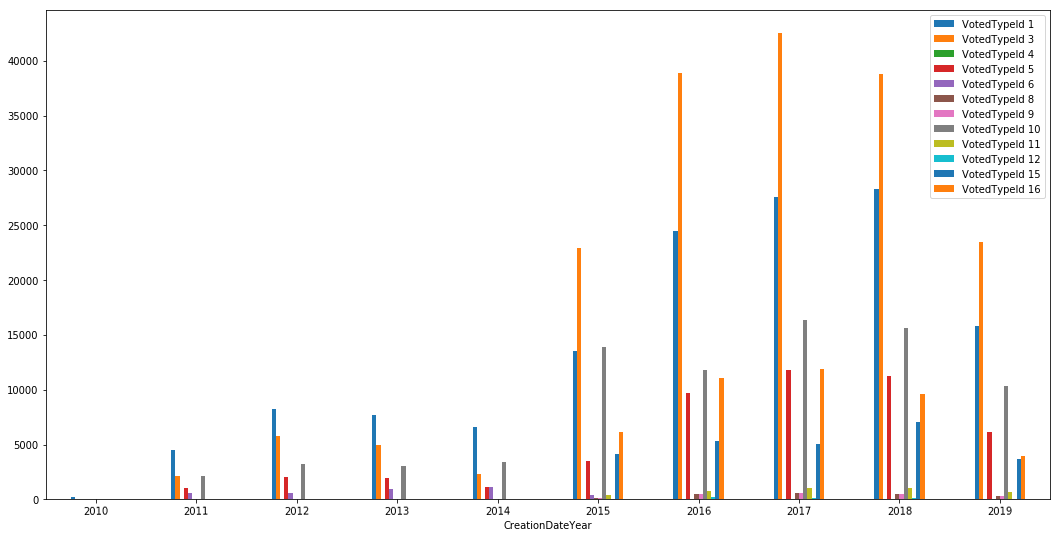

In [464]:
# уберем VotedTypeId2 для интереса
ax = test1.drop(columns=test1.columns[1],axis=1).plot(kind = 'bar',figsize=(18,9),rot=True)
ax.legend(['VotedTypeId'+' ' + str(i) for i in [1,3,4,5,6,8,9,10,11,12,15,16] ])

### COMMENTS

In [510]:
df_comments = pd.read_csv('Comments.csv')

In [512]:
#df_comments.drop('Unnamed: 0',axis = 1, inplace=True)

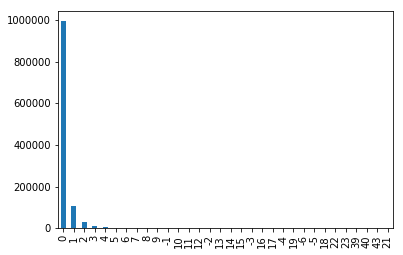

In [517]:
df_comments.Score.value_counts().plot(kind = 'bar')

In [525]:
ScorePercent = df_comments.Score.value_counts(dropna = False)/ \
df_comments.Score.value_counts().values.sum() *100

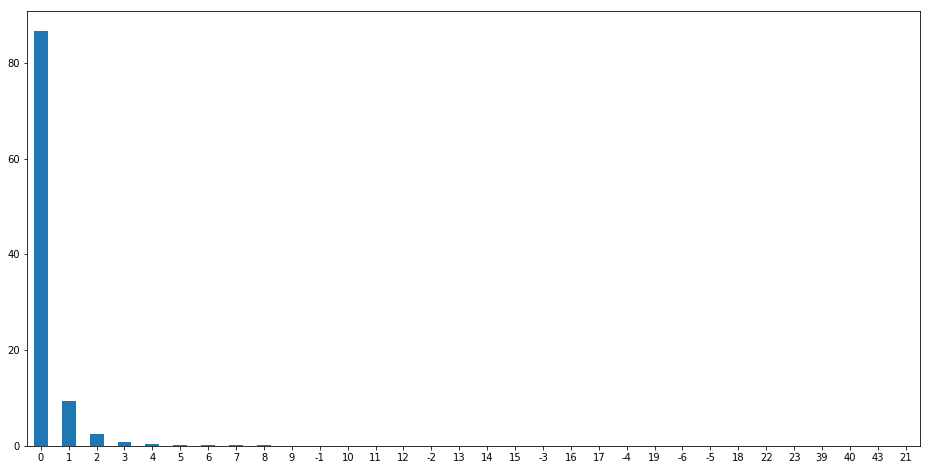

In [528]:
ScorePercent.plot(kind ='bar',figsize=(16,8),rot= True)

In [530]:
df_comments['CreationDateYear'] = df_comments['CreationDate'].apply(str_to_datetime_year)
df_comments['CreationDateMonth'] = df_comments['CreationDate'].apply(str_to_datetime_month)
df_comments['CreationDateDay'] = df_comments['CreationDate'].apply(str_to_datetime_day)

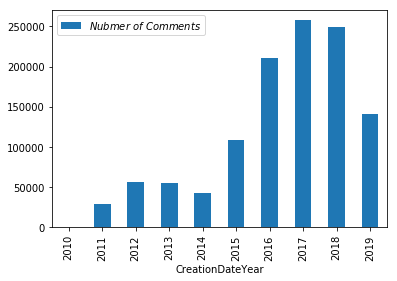

In [550]:
ax = df_comments.groupby('CreationDateYear')[['Id']].count().plot(kind = 'bar')
ax.legend(['$Nubmer$ $of$ $Comments$'])

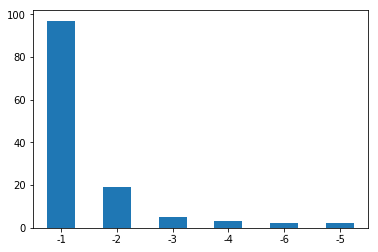

In [587]:
df_comments[df_comments.loc[:,'Score'] <0]['Score'].value_counts().plot(kind = 'bar',rot = True)

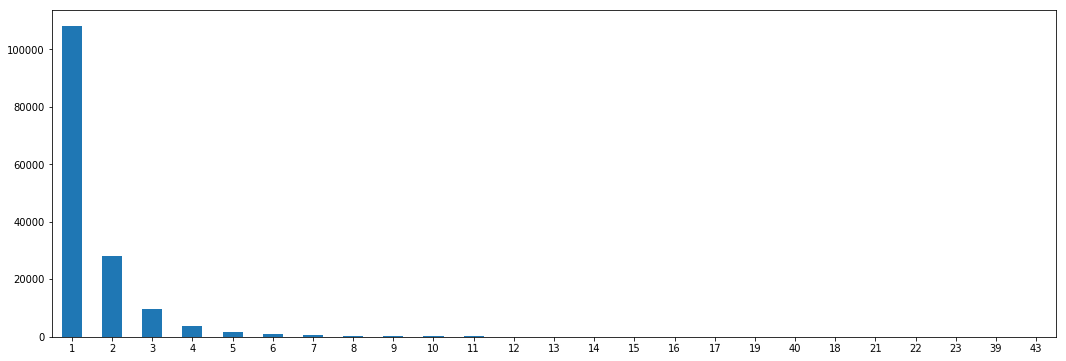

In [592]:
df_comments[df_comments.loc[:,'Score'] >0]['Score'].value_counts().plot(kind = 'bar',rot = True,figsize = (18,6))

### PostLinks

In [593]:
df_postLinks = pd.read_csv('PostLinks.csv')

In [595]:
#df_postLinks.drop('Unnamed: 0',axis =1,inplace=True)

In [632]:
df_postLinks.head(1)

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,1121378,2015-04-01T05:20:45.513,407624,356328,1


### POSTS

In [604]:
df_post = pd.read_csv('Posts.csv')

In [606]:
#df_post.drop('Unnamed: 0',axis =1,inplace=True)

In [1092]:
df_post.Title.value_counts(dropna = False)[:5]

NaN                      320738
Проблема с кодировкой        14
Сортировка массива           12
SQL запрос                    7
Форма обратной связи          7
Name: Title, dtype: int64

In [1081]:
df_post.head(1)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,CreationDateYear,CreationDateMonth,CreationDateDay
0,1,1,2.0,2010-10-10T15:56:41.653,38,11188.0,<p>Нужен простейший пример посылки письма с вл...,2.0,2010-10-10T15:56:41.663,Как из скрипта на Питоне послать письмо с влож...,<python><smtp>,1.0,1,8.0,2010,10,10


In [697]:
# пример для user
df_post[df_post.OwnerUserId ==2].loc[:,['Body']][:10]

,Body
0,<p>Нужен простейший пример посылки письма с вл...
2,"<p>Например, имеется пользователь <em>postgres..."
4,<p>Какая команда Linux наиболее подходит подоб...
5,<p>Для подобного поиска подходит команда find....
6,<p>При попытке извлечения кода svn выдает след...
7,<p>Нужно прописать параметры прокси в настройк...
8,<p>Какая команда наиболее проста и удобна?</p>
9,<p>Команда wc выводит количество переводов стр...
10,<p>Во всех файлах в папке и во вложенных папка...
12,<p>При попытке извлечения кода git выдает ошиб...


In [1089]:
# пример для user
df_post[df_post.OwnerUserId ==2].loc[:,['Body']][:1].Body.to_list()

['<p>Нужен простейший пример посылки письма с вложением через внешний SMTP сервер, например, smtp.yandex.ru.</p>']

In [699]:
df_post[df_post.OwnerUserId ==2].loc[:,['Title']][:10]

,Title
0,Как из скрипта на Питоне послать письмо с влож...
2,Как сохранить и восстановить базу данных Postg...
4,Как найти файл по имени в папках командой из т...
5,NaN
6,Как работать с svn через HTTP прокси на Ubuntu?
7,NaN
8,Как подсчитать строки в файле из терминала в U...
9,NaN
10,Как из терминала заменить слово в файлах в Ubu...
12,Как работать с git через HTTP прокси на Ubuntu?


### PostHistory (для работы не пригодится)

In [622]:
df_postHistory = pd.read_csv('PostHistory.csv')

In [1087]:
df_postHistory[df_postHistory.UserId ==2].loc[:,['Text']][:1].Text.to_list()

['Как из скрипта на Питоне послать письмо с вложением?']

In [1083]:
df_postHistory[df_postHistory.UserId ==2].loc[:,['Text']][:10]

,Text
0,Как из скрипта на Питоне послать письмо с влож...
1,Нужен простейший пример посылки письма с вложе...
2,pythonsmtp
5,Как сохранить и восстановить базу данных Postg...
6,"Например, имеется пользователь postgres, база ..."
7,postgresql
10,Как найти файл по имени в нижележащих папках к...
11,Какая команда Linux наиболее подходит подобног...
12,linux
13,Как найти файл по имени в папках командой из т...


In [716]:
df_postHistory['CreationDateYear'] = df_postHistory['CreationDate'].apply(str_to_datetime_year)
df_postHistory['CreationDateMonth'] = df_postHistory['CreationDate'].apply(str_to_datetime_month)
df_postHistory['CreationDateDay'] = df_postHistory['CreationDate'].apply(str_to_datetime_day)

In [719]:
df_postHistory.CreationDateYear.value_counts(dropna = False)

2018    372894
2017    372097
2016    312055
2019    223935
2015    194055
2012    136203
2014    121301
2013    116792
2011     84213
2010      2057
Name: CreationDateYear, dtype: int64